In [2]:
import torch 
import torch.nn as nn 
import torch.optim as optim 
from torchvision import datasets, transforms 
import matplotlib.pyplot as plt

In [11]:
transform = transforms.ToTensor()
# transform = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.5), (0.5))
#     ])
mnist_data = datasets.MNIST(root = './data', train = True, download = True, transform = transform)
data_loader = torch.utils.data.DataLoader(dataset=mnist_data, batch_size = 64, shuffle = True)


In [12]:
dataiter = iter(data_loader)
images, labels = dataiter.next()
print(torch.max(images), torch.min(images))

tensor(1.) tensor(0.)


In [15]:
class Autoencoder_Linear(nn.Module):
    def __init__(self):
        #N, 794
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,12),
            nn.ReLU(),
            nn.Linear(12,3)
            )
        self.decoder = nn.Sequential(
            nn.Linear(3,12),
            nn.ReLU(),
            nn.Linear(12,64),
            nn.ReLU(),
            nn.Linear(64,128),
            nn.ReLU(),
            nn.Linear(128,28*28),
            nn.Sigmoid()  #nned to get output vlaues between 0 and 1 max and min value of the image 
            )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
        
#note: [-1,1] -> nn.Tanh

In [25]:
class Autoencoder(nn.Module):
    def __init__(self):
        #N, 28,28
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1,16,3,stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16,32,3,stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32,64,7)
            )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64,32,7),
            nn.ReLU(),
            nn.ConvTranspose2d(32,16,3,stride=2, padding=1, output_padding =1),
            nn.ReLU(),
            nn.ConvTranspose2d(16,1,3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()  #nned to get output vlaues between 0 and 1 max and min value of the image 
            )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
        
#note: [-1,1] -> nn.Tanh
#nn.MaxPool2d -< nn.MaxUnpool2d

In [26]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3, weight_decay = 1e-5)

In [28]:
num_epochs = 10
outputs = []
for epoch in range(num_epochs):
    for (img, _) in data_loader:
        #img = img.reshape(-1,28*28)
        recon = model(img)
        loss = criterion(recon, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch: {epoch+1}, Loss = {loss.item():.4f}")
    outputs.append((epoch, img, recon))   #returning a tuple 


Epoch: 1, Loss = 0.0077
Epoch: 2, Loss = 0.0055
Epoch: 3, Loss = 0.0042
Epoch: 4, Loss = 0.0035
Epoch: 5, Loss = 0.0030
Epoch: 6, Loss = 0.0028
Epoch: 7, Loss = 0.0025
Epoch: 8, Loss = 0.0027
Epoch: 9, Loss = 0.0027
Epoch: 10, Loss = 0.0028


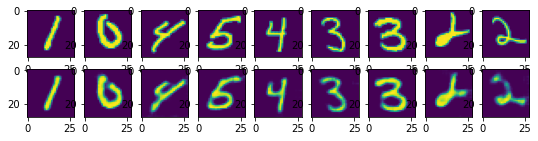

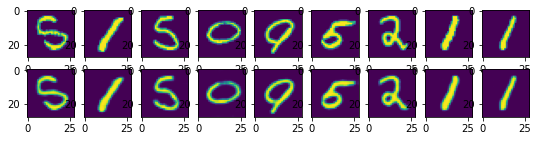

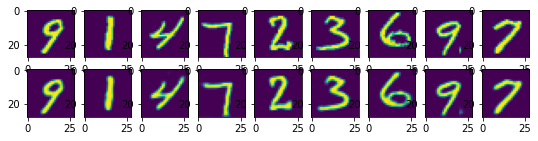

In [29]:
for k in range(0, num_epochs, 4):
    plt.figure(figsize=(9,2))
    plt.gray 
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i>=9: break
        plt.subplot(2,9,i+1)
        item = item.reshape(-1, 28,28)
        plt.imshow(item[0])

    for i, item in enumerate(recon):
        if i>=9:break
        plt.subplot(2,9, 9+i+1)  #row_length + i + 1
        item = item.reshape(-1,28,28)
        plt.imshow(item[0])